# All Variables

- df_expenses 
- filtered_expenses: removes big, one time purchases and transfers between accounts
- total_yearly_expenses: total expenses gropuped by year
- monthly_grouped_expenses: expenses grouped by month-year
- df_income: inital df filtered to income transactions only
- total_yearly”_income: income grouped per year
- monthly_income_grouped: income grouped per month-year
- monthly_income_df: monthly income sorted by year month
- df_income_category: income grouped by category
- df_expenses: expenses grouped by category


import pandas as pd
import numpy as np

df = pd.read_excel('/Users/mattdamberg/Desktop/Documents/Excel Files/Transactions.xlsx')

df.head()


In [91]:
# Create Year Column
df['Year'] = df['Date'].dt.year

# Create Month_Year column in the format 'Jan-25'
df['Month_Year'] = df['Date'].dt.strftime('%b-%y')

# Display the first few rows to verify
df.head()

# Note: 
# %b gives the abbreviated month name (Jan, Feb, etc.)
# %y gives the year without century as a zero-padded decimal number (00, 01, ..., 99)
# If you want full month name, use %B instead of %b
# If you want 4-digit year, use %Y instead of %y

,Month,Date,Original Date,Account Type,Account Name,Account Number,Institution Name,Amount,Description,Category,Year,Reversed_Amount,Month_Year
0,October,2025-10-03,2025-10-03,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,-1566.99,Fairview Health PR PAYMENT 1000-0000593,Income,2025,1566.99,Oct-25
1,October,2025-10-02,2025-10-02,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,149.98,XCEL ENERGY-WI XCELENERGY 00154498346,Bills & Utilities,2025,-149.98,Oct-25
2,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,25.00,RECURRING TRANSFER TO DAMBERG J WAY2SAVE SAVIN...,Savings Transfer,2025,-25.00,Oct-25
3,October,2025-10-01,2025-10-01,Cash,WAY2SAVE® SAVINGS ...0999,999,Wells Fargo,-25.00,RECURRING TRANSFER FROM DAMBERG J EVERYDAY CHE...,Savings Transfer,2025,25.00,Oct-25
4,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,2946.74,HUNTINGTON NAT'L MTG PMTS 100125 0072362007 MA...,Loan Payment,2025,-2946.74,Oct-25


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3821 entries, 0 to 3820
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             3821 non-null   object        
 1   Date              3821 non-null   datetime64[ns]
 2   Original Date     3821 non-null   datetime64[ns]
 3   Account Type      3821 non-null   object        
 4   Account Name      3821 non-null   object        
 5   Account Number    3821 non-null   int64         
 6   Institution Name  3821 non-null   object        
 7   Custom Name       2 non-null      object        
 8   Amount            3821 non-null   float64       
 9   Description       3821 non-null   object        
 10  Category          3821 non-null   object        
 11  Note              1 non-null      object        
 12  Ignored From      4 non-null      object        
 13  Tax Deductible    3 non-null      object        
 14  Year              3821 n

In [92]:
# Reverse the sign of the Amount column (multiply by -1)
df['Reversed_Amount'] = df['Amount'] * -1

# Verify the change with a quick check
print("Sample of reversed Amount values:")
print(df[['Description', 'Category', 'Amount']].head(10))

# If you want to verify specifically for income and expenses
print("\nSample income transactions (should now be positive):")
print(df[df['Category'] == 'Income'][['Description', 'Amount']].head(5))

print("\nSample expense transactions (should now be negative):")
print(df[df['Category'] != 'Income'][['Description', 'Amount']].head(5))

# Note: This change affects the original DataFrame. 
# If you want to keep the original values, create a new column instead:
df.head()

Sample of reversed Amount values:
                                         Description              Category  \
0            Fairview Health PR PAYMENT 1000-0000593                Income   
1              XCEL ENERGY-WI XCELENERGY 00154498346     Bills & Utilities   
2  RECURRING TRANSFER TO DAMBERG J WAY2SAVE SAVIN...      Savings Transfer   
3  RECURRING TRANSFER FROM DAMBERG J EVERYDAY CHE...      Savings Transfer   
4  HUNTINGTON NAT'L MTG PMTS 100125 0072362007 MA...          Loan Payment   
5     PURCHASE APPLE.COM/BI 866-712-7753 CA CARD2294  Entertainment & Rec.   
6                                   INTEREST PAYMENT                Income   
7    VENMO PAYMENT 250927 1045129301404 MATT DAMBERG  Entertainment & Rec.   
8  CHASE CREDIT CRD EPAY 250928 8757396475 JESSIC...   Credit Card Payment   
9                                WELLS FARGO REWARDS    Internal Transfers   

    Amount  
0 -1566.99  
1   149.98  
2    25.00  
3   -25.00  
4  2946.74  
5    11.91  
6    -0.03  
7  

,Month,Date,Original Date,Account Type,Account Name,Account Number,Institution Name,Amount,Description,Category,Year,Reversed_Amount,Month_Year
0,October,2025-10-03,2025-10-03,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,-1566.99,Fairview Health PR PAYMENT 1000-0000593,Income,2025,1566.99,Oct-25
1,October,2025-10-02,2025-10-02,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,149.98,XCEL ENERGY-WI XCELENERGY 00154498346,Bills & Utilities,2025,-149.98,Oct-25
2,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,25.00,RECURRING TRANSFER TO DAMBERG J WAY2SAVE SAVIN...,Savings Transfer,2025,-25.00,Oct-25
3,October,2025-10-01,2025-10-01,Cash,WAY2SAVE® SAVINGS ...0999,999,Wells Fargo,-25.00,RECURRING TRANSFER FROM DAMBERG J EVERYDAY CHE...,Savings Transfer,2025,25.00,Oct-25
4,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,2946.74,HUNTINGTON NAT'L MTG PMTS 100125 0072362007 MA...,Loan Payment,2025,-2946.74,Oct-25


In [93]:
# 1) Clean column names (kills invisible spaces, normalizes)
df.columns = (
    df.columns
      .str.replace('\u00a0', ' ', regex=False)   # non-breaking space -> space
      .str.strip()
)

# 2) Remove the specified columns
columns_to_remove = ['Note', 'Ignored From', 'Tax Deductible', 'Custom Name']
df = df.drop(columns=columns_to_remove, errors='ignore')
# The 'errors='ignore'' parameter ensures the code doesn't fail if any column doesn't exist

# 3) Clean data in remaining columns based on their data types
for col in df.columns:
    # Handle string (object) columns
    if df[col].dtype == 'object':
        # Replace non-breaking spaces with regular spaces and strip whitespace
        df[col] = df[col].astype(str).replace('nan', np.nan).str.replace('\u00a0', ' ', regex=False).str.strip()
        
        # Convert back to NaN values that were originally NaN
        df[col] = df[col].replace('nan', np.nan)

# 4) Filter and select
df_income = df.loc[df['Category'].eq('Income'), ['Year', 'Month_Year', 'Date', 'Reversed_Amount']]

# Display the first 10 rows
df_income.head(10)

# Don't forget to import numpy if not already imported
# import numpy as np

# Optional: Check the remaining columns
print("Remaining columns:", df.columns.tolist())

df_income.head()

Remaining columns: ['Month', 'Date', 'Original Date', 'Account Type', 'Account Name', 'Account Number', 'Institution Name', 'Amount', 'Description', 'Category', 'Year', 'Reversed_Amount', 'Month_Year']


,Year,Month_Year,Date,Reversed_Amount
0,2025,Oct-25,2025-10-03,1566.99
6,2025,Sep-25,2025-09-30,0.03
13,2025,Sep-25,2025-09-19,2182.42
14,2025,Sep-25,2025-09-19,2752.41
29,2025,Sep-25,2025-09-05,1381.91


In [140]:
# Remove outlier expenses like house down payment 
df_expenses = df[df['Category'] != 'Income']

# Create variable for expenses > 10000 AND exclude descriptions containing 'PERSHING' or 'TRANSFER'
_ = df_expenses[
    (df_expenses['Reversed_Amount'] > -10000) & 
    (~df_expenses['Description'].str.contains('PERSHING', case=False, na=False)) &
    (~df_expenses['Description'].str.contains('TRANSFER', case=False, na=False)) &
    (~df_expenses['Category'].str.contains('TRANSFER', case=False, na=False)) &
    (~df_expenses['Description'].str.contains('ZELLE', case=False, na=False)) 
]

# Display the first 50 rows
filtered_expenses.head()

# Note: 
# - The tilde (~) operator negates the condition, so we're keeping rows that DON'T contain these terms
# - case=False makes the search case-insensitive
# - na=False treats NaN values as False rather than raising an error

,Month,Date,Original Date,Account Type,Account Name,Account Number,Institution Name,Amount,Description,Category,Year,Reversed_Amount,Month_Year
1,October,2025-10-02,2025-10-02,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,149.98,XCEL ENERGY-WI XCELENERGY 00154498346,Bills & Utilities,2025,-149.98,Oct-25
4,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,2946.74,HUNTINGTON NAT'L MTG PMTS 100125 0072362007 MA...,Loan Payment,2025,-2946.74,Oct-25
5,September,2025-09-30,2025-09-30,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,11.91,PURCHASE APPLE.COM/BI 866-712-7753 CA CARD2294,Entertainment & Rec.,2025,-11.91,Sep-25
7,September,2025-09-29,2025-09-29,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,250.00,VENMO PAYMENT 250927 1045129301404 MATT DAMBERG,Entertainment & Rec.,2025,-250.00,Sep-25
8,September,2025-09-29,2025-09-29,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,593.36,CHASE CREDIT CRD EPAY 250928 8757396475 JESSIC...,Credit Card Payment,2025,-593.36,Sep-25


In [143]:
# First group by 'Year', then calculate the sum for each group
total_yearly_expenses = filtered_expenses.groupby(['Year'])['Reversed_Amount'].sum()

print(f"Total Yearly Expenses:\n{total_yearly_expenses}")

# For monthly expenses, we need to ensure chronological order
# Group by the period and sum - keep the period object for proper sorting
monthly_grouped_expenses = filtered_expenses.groupby(filtered_expenses['Date'].dt.to_period('M'))['Reversed_Amount'].sum()

# Sort chronologically - period objects maintain chronological order
# (this step is actually optional since periods are already chronologically sorted)
monthly_grouped_expenses = monthly_grouped_expenses.sort_index()

# Now convert the index to the desired string format for display
monthly_grouped_expenses.index = monthly_grouped_expenses.index.strftime('%b-%y')

# Display top 50 months
monthly_grouped_expenses.head()
# Display Bottom 50
monthly_grouped_expenses.tail()


# Alternative approach if you need to sort an already-formatted month-year string:
# Create a dictionary mapping month names to their numerical values
# month_dict = {month: i for i, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#                                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])}
# Sort using a custom key function
# monthly_grouped_expenses = monthly_grouped.reset_index()
# monthly_grouped_expenses['month'] = monthly_grouped['index'].str[:3]
# monthly_grouped_expenses['year'] = monthly_grouped['index'].str[-2:]
# monthly_grouped_expenses monthly_grouped = monthly_grouped.sort_values(by=['year', 'month'], 
#                   key=lambda x: x.map(lambda y: int(y) if x.name == 'year' else month_dict[y]))

Total Yearly Expenses:
Year
2019   -10421.48
2020   -35554.21
2021   -21594.91
2022    -9626.56
2023   -44904.99
2024   -56453.74
2025   -60745.68
Name: Reversed_Amount, dtype: float64


Date
Jun-25   -6821.36
Jul-25   -6883.44
Aug-25   -7271.75
Sep-25   -8144.37
Oct-25   -3096.72
Name: Reversed_Amount, dtype: float64

In [162]:
## Income

# Make sure we have income data - create a copy to avoid SettingWithCopyWarning
df_income = df[df['Category'] == 'Income'].copy()

# Total Yearly Income
total_yearly_income = df_income.groupby(['Year'])['Reversed_Amount'].sum()

total_yearly_income.head()

# Check if we have any income data
if len(df_income) > 0:
    # Print the first few values of Month_Year to understand its format
    print("Sample Month_Year values:", df_income['Month_Year'].head().tolist())
    
    # Try to convert Month_Year to datetime with explicit format
    # If you know the format, replace 'infer' with the format string (e.g., '%Y-%m-%d')
    try:
        # First check what type Month_Year is
        print("Month_Year data type:", type(df_income['Month_Year'].iloc[0]))
        
        # If Month_Year is already a period, convert to datetime first
        if hasattr(df_income['Month_Year'], 'dt'):
            # Already datetime-like, use directly
            pass
        else:
            # Try to convert to datetime
            df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')
        
        # Group by month using string formatting if datetime conversion fails
        if df_income['Month_Year'].isna().all():
            print("Datetime conversion failed. Using alternative approach.")
            # Alternative approach if datetime conversion fails
            if 'Year' in df_income.columns and 'Month' in df_income.columns:
                df_income['Month_Year_Str'] = df_income['Year'].astype(str) + '-' + df_income['Month'].astype(str).str.zfill(2)
                monthly_income_grouped = df_income.groupby('Month_Year_Str')['Reversed_Amount'].sum()
            else:
                print("Cannot process: Missing Year or Month columns")
                raise ValueError("Missing required columns")
        else:
            # Use datetime approach
            monthly_income_grouped = df_income.groupby(df_income['Month_Year'].dt.to_period('M'))['Reversed_Amount'].sum()
        
        # Sort by date
        monthly_income_sorted = monthly_income_grouped.sort_index()
        
        # Convert to DataFrame for better display
        monthly_income_df = monthly_income_sorted.reset_index()
        monthly_income_df.columns = ['Month_Year', 'Income']
        
        # Format the month column if it's a period
        if isinstance(monthly_income_df['Month_Year'].iloc[0], pd.Period):
            monthly_income_df['Month_Year'] = monthly_income_df['Month_Year'].astype(str).str.replace('M', '-')
        
        # Display results
        print(f"Total income records: {len(df_income)}")
        print("Top income months:")
        display(monthly_income_df.head())
        
        if len(monthly_income_df) > 5:
            print("Bottom income months:")
            display(monthly_income_df.tail())
    except Exception as e:
        print(f"Error processing data: {e}")
        # Print more information about the DataFrame
        print("\nDataFrame columns:", df_income.columns.tolist())
        print("\nDataFrame info:")
        print(df_income.info())
else:
    print("No income data found. Check if 'Category' column contains 'Income' values.")
    # Create empty DataFrame with proper columns
    monthly_income_df = pd.DataFrame(columns=['Month_Year', 'Income'])

Sample Month_Year values: ['Oct-25', 'Sep-25', 'Sep-25', 'Sep-25', 'Sep-25']
Month_Year data type: <class 'str'>
Datetime conversion failed. Using alternative approach.
Total income records: 294
Top income months:


/var/folders/ys/_1g_ljds3w70ztsdgc18v7mc0000gn/T/ipykernel_12860/3092563722.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')


,Month_Year,Income
0,2019-December,3011.93
1,2019-November,2954.46
2,2019-October,3236.50
3,2020-April,3151.31
4,2020-August,3848.15


Bottom income months:


,Month_Year,Income
64,2025-June,8382.82
65,2025-March,10375.99
66,2025-May,13774.35
67,2025-October,1566.99
68,2025-September,9069.18


# Income Visuals

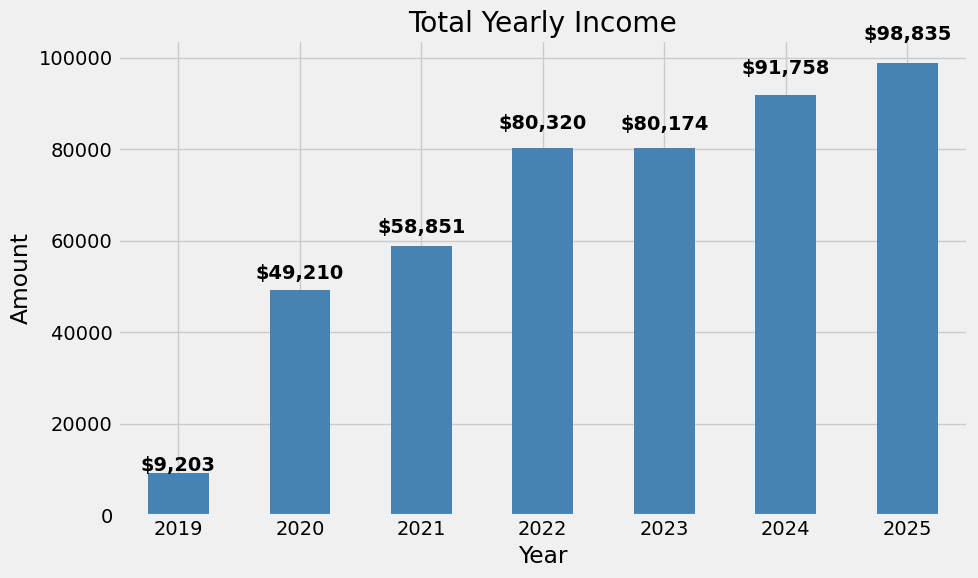

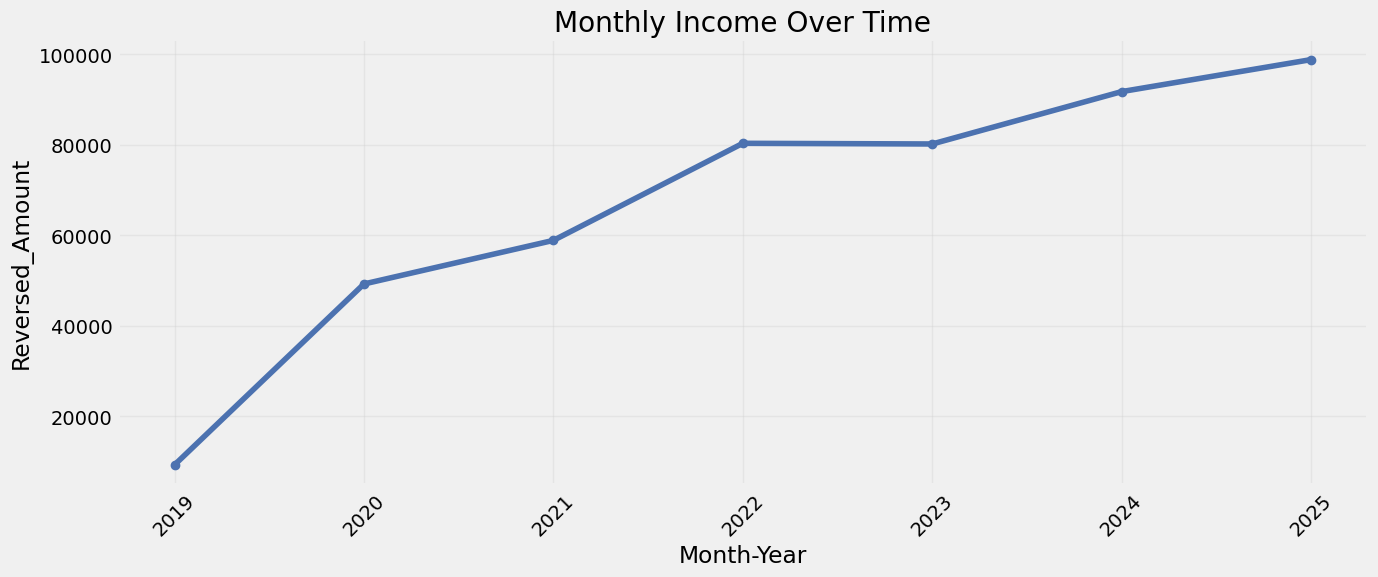

Visualization code has been executed. If plots are not visible, check if your environment supports plot display.


In [165]:
import matplotlib.pyplot as plt
import pandas as pd

# Basic plot for yearly income
plt.figure(figsize=(10, 6))
ax = total_yearly_income.plot(kind='bar', color='steelblue')  # Save the axes object
plt.title('Total Yearly Income')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=0)

# Add data labels positioned above each bar (for income values)
for i, v in enumerate(total_yearly_income):
    # For positive values, position labels above the bars
    label_position = v + (abs(v) * 0.05)  # 5% above the end of the bar
    ax.text(i, label_position, f'${v:,.0f}', 
            ha='center', 
            color='black',
            fontweight='bold')
plt.tight_layout()
plt.show()  # This is important to display the plot

# Basic plot for monthly income
plt.figure(figsize=(14, 6))
total_yearly_income.plot(kind='line', marker='o')
plt.title('Monthly Income Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Reversed_Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()  # This is important to display the plot

# Print a message to confirm code execution
print("Visualization code has been executed. If plots are not visible, check if your environment supports plot display.")

# If you're in a Jupyter notebook, make sure you have this at the beginning:
# %matplotlib inline

# If you're in a script or other environment, you might need to install additional packages
# or configure your environment to display plots.

# Expenses Visuals

# Assistant
The error occurs because the code is trying to use the `.dt` accessor on a column that is not a datetime type. The `Month_Year` column in your DataFrame is likely not in a datetime format.

Would you like me to provide the corrected code?

# User
yes

In [166]:
# Assistant
## Income

# Make sure we have income data
df_income = df[df['Category'] == 'Income']

# Total Yearly Income
total_yearly_income = df_income.groupby(['Year'])['Reversed_Amount'].sum()

total_yearly_income.head()

# Check if we have any income data
if len(df_income) > 0:
    # First, ensure Month_Year is datetime type
    if not pd.api.types.is_datetime64_any_dtype(df_income['Month_Year']):
        # Convert Month_Year to datetime if it's not already
        df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')
    
    # Group by month
    monthly_income_grouped = df_income.groupby(df_income['Month_Year'].dt.to_period('M'))['Reversed_Amount'].sum()
    
    # Sort by date
    monthly_income_sorted = monthly_income_grouped.sort_index()
    
    # Convert to DataFrame for better display
    monthly_income_df = monthly_income_sorted.reset_index()
    monthly_income_df.columns = ['Month_Year', 'Income']
    
    # Format the month column to display as 'MMM-YY'
    monthly_income_df['Month_Year'] = monthly_income_df['Month_Year'].astype(str).str.replace('M', '-')
    
    # Display results
    print(f"Total income records: {len(df_income)}")
    print("Top income months:")
    display(monthly_income_df.head())
    
    if len(monthly_income_df) > 50:
        print("Bottom income months:")
        display(monthly_income_df.tail())
else:
    print("No income data found. Check if 'Category' column contains 'Income' values.")
    # Create empty DataFrame with proper columns
    monthly_income_df = pd.DataFrame(columns=['Month_Year', 'Income'])

Total income records: 294
Top income months:


/var/folders/ys/_1g_ljds3w70ztsdgc18v7mc0000gn/T/ipykernel_12860/1799024652.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')
/var/folders/ys/_1g_ljds3w70ztsdgc18v7mc0000gn/T/ipykernel_12860/1799024652.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')


,Month_Year,Income


# User
/var/folders/ys/_1g_ljds3w70ztsdgc18v7mc0000gn/T/ipykernel_12860/1388291598.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')
Total income records: 294
Top income months:
/var/folders/ys/_1g_ljds3w70ztsdgc18v7mc0000gn/T/ipykernel_12860/1388291598.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')


this returns an empyu table

# Assistant
I see two issues in the output:

1. A warning about not being able to infer the datetime format
2. A SettingWithCopyWarning
3. The resulting table is empty

Let me provide an improved solution:

Would you like me to provide the corrected code?

# User
yes

In [167]:
# Assistant
## Income

# Make sure we have income data - create a copy to avoid SettingWithCopyWarning
df_income = df[df['Category'] == 'Income'].copy()

# Total Yearly Income
total_yearly_income = df_income.groupby(['Year'])['Reversed_Amount'].sum()

total_yearly_income.head()

# Check if we have any income data
if len(df_income) > 0:
    # Print the first few values of Month_Year to understand its format
    print("Sample Month_Year values:", df_income['Month_Year'].head().tolist())
    
    # Try to convert Month_Year to datetime with explicit format
    # If you know the format, replace 'infer' with the format string (e.g., '%Y-%m-%d')
    try:
        # First check what type Month_Year is
        print("Month_Year data type:", type(df_income['Month_Year'].iloc[0]))
        
        # If Month_Year is already a period, convert to datetime first
        if hasattr(df_income['Month_Year'], 'dt'):
            # Already datetime-like, use directly
            pass
        else:
            # Try to convert to datetime
            df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')
        
        # Group by month using string formatting if datetime conversion fails
        if df_income['Month_Year'].isna().all():
            print("Datetime conversion failed. Using alternative approach.")
            # Alternative approach if datetime conversion fails
            if 'Year' in df_income.columns and 'Month' in df_income.columns:
                df_income['Month_Year_Str'] = df_income['Year'].astype(str) + '-' + df_income['Month'].astype(str).str.zfill(2)
                monthly_income_grouped = df_income.groupby('Month_Year_Str')['Reversed_Amount'].sum()
            else:
                print("Cannot process: Missing Year or Month columns")
                raise ValueError("Missing required columns")
        else:
            # Use datetime approach
            monthly_income_grouped = df_income.groupby(df_income['Month_Year'].dt.to_period('M'))['Reversed_Amount'].sum()
        
        # Sort by date
        monthly_income_sorted = monthly_income_grouped.sort_index()
        
        # Convert to DataFrame for better display
        monthly_income_df = monthly_income_sorted.reset_index()
        monthly_income_df.columns = ['Month_Year', 'Income']
        
        # Format the month column if it's a period
        if isinstance(monthly_income_df['Month_Year'].iloc[0], pd.Period):
            monthly_income_df['Month_Year'] = monthly_income_df['Month_Year'].astype(str).str.replace('M', '-')
        
        # Display results
        print(f"Total income records: {len(df_income)}")
        print("Top income months:")
        display(monthly_income_df.head())
        
        if len(monthly_income_df) > 5:
            print("Bottom income months:")
            display(monthly_income_df.tail())
    except Exception as e:
        print(f"Error processing data: {e}")
        # Print more information about the DataFrame
        print("\nDataFrame columns:", df_income.columns.tolist())
        print("\nDataFrame info:")
        print(df_income.info())
else:
    print("No income data found. Check if 'Category' column contains 'Income' values.")
    # Create empty DataFrame with proper columns
    monthly_income_df = pd.DataFrame(columns=['Month_Year', 'Income'])

Sample Month_Year values: ['Oct-25', 'Sep-25', 'Sep-25', 'Sep-25', 'Sep-25']
Month_Year data type: <class 'str'>
Datetime conversion failed. Using alternative approach.
Total income records: 294
Top income months:


/var/folders/ys/_1g_ljds3w70ztsdgc18v7mc0000gn/T/ipykernel_12860/3073558336.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_income['Month_Year'] = pd.to_datetime(df_income['Month_Year'], errors='coerce')


,Month_Year,Income
0,2019-December,3011.93
1,2019-November,2954.46
2,2019-October,3236.50
3,2020-April,3151.31
4,2020-August,3848.15


Bottom income months:


,Month_Year,Income
64,2025-June,8382.82
65,2025-March,10375.99
66,2025-May,13774.35
67,2025-October,1566.99
68,2025-September,9069.18


# User
import matplotlib.pyplot as plt
import pandas as pd

# Basic plot for yearly expenses
plt.figure(figsize=(10, 6))
total_yearly_income.plot(kind='bar', color='steelblue')
plt.title('Total Yearly Income')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=0)


# Add data labels positioned below each bar (for negative values)
for i, v in enumerate(total_yearly_expenses):
    # For negative values, position labels below the bars
    label_position = v + (abs(v) * 0.05)  # 5% below the end of the bar
    ax.text(i, label_position, f'${v:,.0f}', 
            ha='center', 
            color='black',  # White text for better visibility
            fontweight='bold')
plt.tight_layout()
plt.show()  # This is important to display the plot


# Basic plot for monthly expenses
plt.figure(figsize=(14, 6))
total_yearly_income.plot(kind='line', marker='o')
plt.title('Monthly Income Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Reversed_Amount')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()  # This is important to display the plot

# Print a message to confirm code execution
print("Visualization code has been executed. If plots are not visible, check if your environment supports plot display.")

# If you're in a Jupyter notebook, make sure you have this at the beginning:
# %matplotlib inline

# If you're in a script or other environment, you might need to install additional packages
# or configure your environment to display plots.

Why arent my data labels showing up for the bar charet?

# Assistant
The data labels aren't showing up in your bar chart because there's a reference to an undefined variable `ax` and you're trying to add labels to `total_yearly_expenses` while plotting `total_yearly_income`.

Would you like me to provide the corrected code?

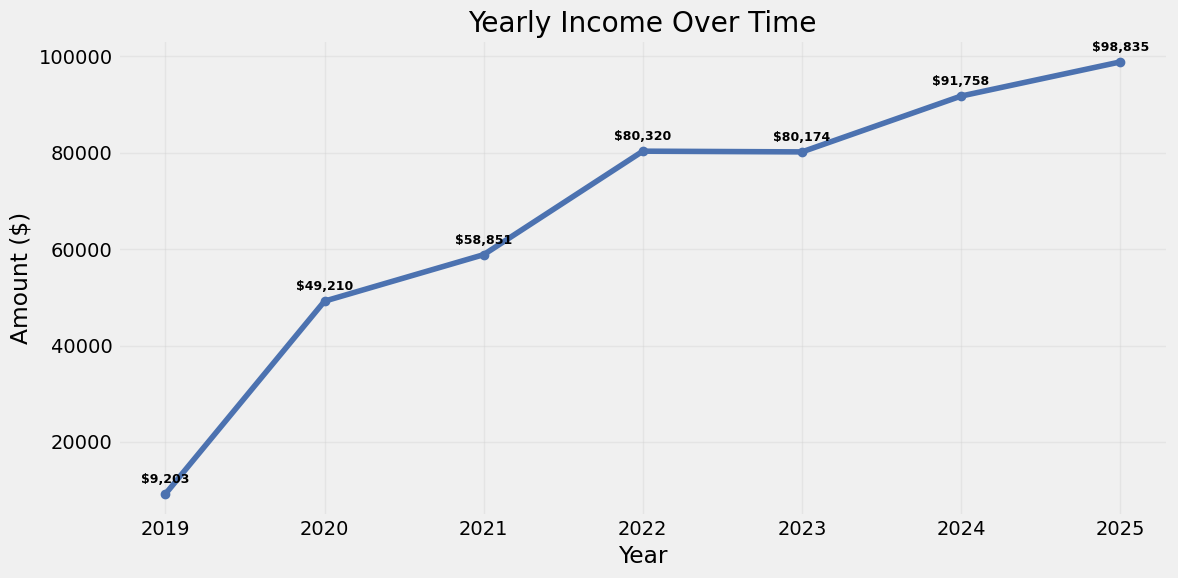

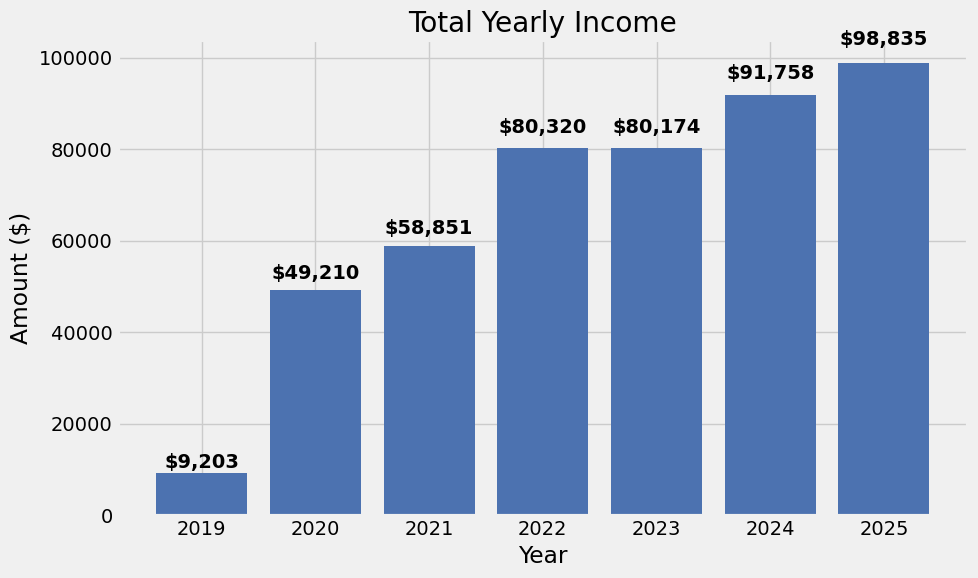

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Clean, ordered Series
s = total_yearly_income.sort_index().astype(float)

x = np.arange(len(s))              # 0..n-1
y = s.values                       # amounts
years = s.index.astype(str)        # tick labels

# -------- LINE --------
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o')

for xi, yi in zip(x, y):
    plt.annotate(f'${yi:,.0f}', (xi, yi), xytext=(0, 8),
                 textcoords='offset points', ha='center', fontweight='bold', fontsize=9)

plt.xticks(x, years, rotation=0)
plt.title('Yearly Income Over Time'); plt.xlabel('Year'); plt.ylabel('Amount ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# -------- BAR (optional) --------
plt.figure(figsize=(10,6))
bars = plt.bar(x, y)

for xi, yi in zip(x, y):
    plt.text(xi, yi + abs(yi)*0.03, f'${yi:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.xticks(x, years, rotation=0)
plt.title('Total Yearly Income'); plt.xlabel('Year'); plt.ylabel('Amount ($)')
plt.tight_layout(); plt.show()


In [180]:
total_yearly_income.head()

Year
2019     9202.89
2020    49210.50
2021    58851.39
2022    80320.46
2023    80173.55
Name: Reversed_Amount, dtype: float64

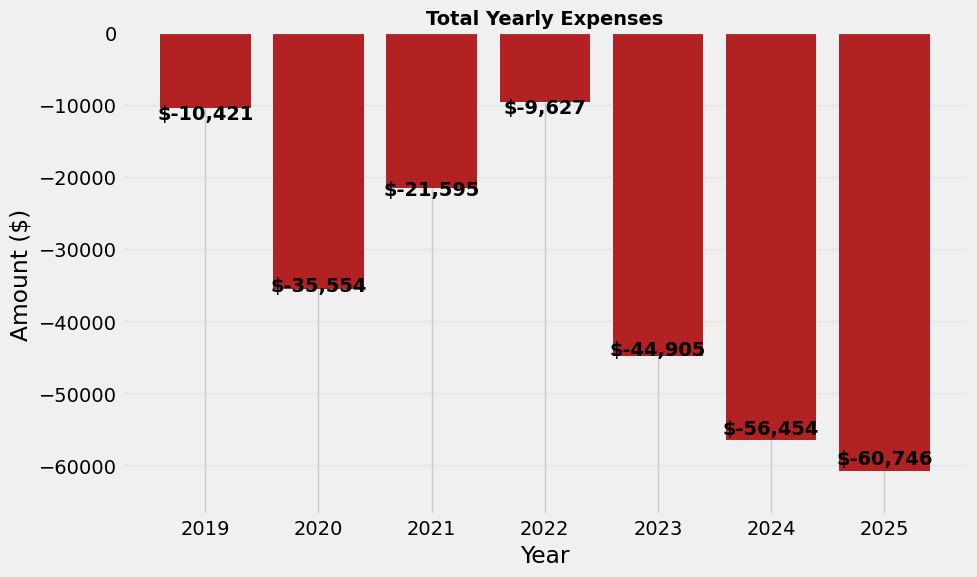

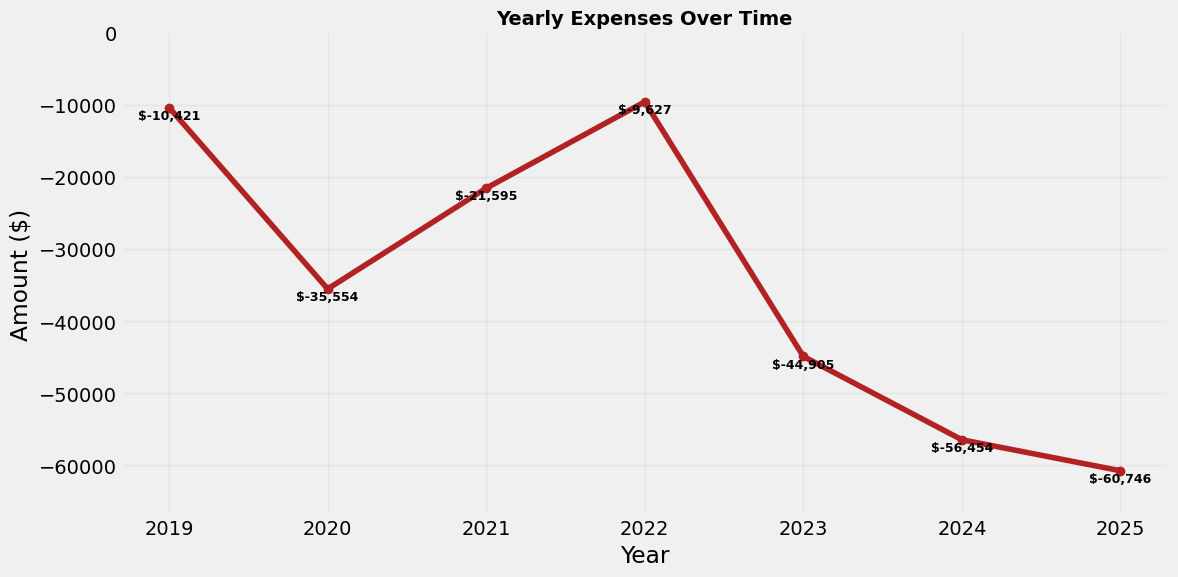

Visualization code executed successfully — both bar and line charts displayed.


In [187]:
import matplotlib.pyplot as plt
import numpy as np

# --- CLEAN SERIES ---
s = total_yearly_expenses.sort_index().astype(float)
x = np.arange(len(s))
y = s.values
years = s.index.astype(str)

# ==========================================================
# BAR CHART: Yearly Expenses
# ==========================================================
plt.figure(figsize=(10, 6))
bars = plt.bar(x, y, color='firebrick')

# Add labels (below if negative, above if positive)
for xi, yi in zip(x, y):
    offset = -abs(yi) * 0.05 if yi < 0 else abs(yi) * 0.03
    va = 'top' if yi < 0 else 'bottom'
    plt.text(xi, yi - offset if yi < 0 else yi + offset,
             f'${yi:,.0f}', ha='center', va=va, fontweight='bold', color='black')

plt.xticks(x, years, rotation=0)
plt.title('Total Yearly Expenses', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.grid(True, axis='y', alpha=0.3)

# Adjust limits for negative values
if all(y < 0):
    plt.ylim(min(y) * 1.1, 0)
elif any(y < 0):
    plt.ylim(min(y) * 1.1, max(y) * 1.1)

plt.tight_layout()
plt.show()

# ==========================================================
# LINE CHART: Yearly Expenses Over Time
# ==========================================================
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', color='firebrick')

# Add labels slightly below each point if negative
for xi, yi in zip(x, y):
    offset = -8 if yi < 0 else 8
    plt.annotate(f'${yi:,.0f}', (xi, yi), xytext=(0, offset),
                 textcoords='offset points', ha='center',
                 fontweight='bold', fontsize=9, color='black')

plt.xticks(x, years, rotation=0)
plt.title('Yearly Expenses Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.grid(True, alpha=0.3)

if all(y < 0):
    plt.ylim(min(y) * 1.1, 0)
elif any(y < 0):
    plt.ylim(min(y) * 1.1, max(y) * 1.1)

plt.tight_layout()
plt.show()

# ==========================================================
print("Visualization code executed successfully — both bar and line charts displayed.")


In [ ]:
net_income = df[df['Net Income'] = total

## Totals by Category

In [152]:
# Corrected code
# Option 1: If 'Description' is a column in df_income
df_income_category = df_income.groupby('Description')['Reversed_Amount'].sum()

# Option 2: If you need to group by index values in the Series
# Assuming 'Reversed_Amount' is a Series with 'Description' as its index
# df_income_category = df_income['Reversed_Amount'].groupby(level='Description').sum()

df_income_category.head()

df_income_category.head()

Description
ALLINA HEALTH SY DIR DEP 191004 10793510 DAMBERG,MATTHEW W    1627.39
ALLINA HEALTH SY DIR DEP 191018 10793510 DAMBERG,MATTHEW W    1609.11
ALLINA HEALTH SY DIR DEP 191101 10793510 DAMBERG,MATTHEW W    1520.94
ALLINA HEALTH SY DIR DEP 191115 10793510 DAMBERG,MATTHEW W    1433.52
ALLINA HEALTH SY DIR DEP 191129 10793510 DAMBERG,MATTHEW W    1542.86
Name: Reversed_Amount, dtype: float64

In [149]:
df_income.head()

,Month,Date,Original Date,Account Type,Account Name,Account Number,Institution Name,Amount,Description,Category,Year,Reversed_Amount,Month_Year
0,October,2025-10-03,2025-10-03,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,-1566.99,Fairview Health PR PAYMENT 1000-0000593,Income,2025,1566.99,Oct-25
6,September,2025-09-30,2025-09-30,Cash,WAY2SAVE® SAVINGS ...8119,8119,Wells Fargo,-0.03,INTEREST PAYMENT,Income,2025,0.03,Sep-25
13,September,2025-09-19,2025-09-19,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,-2182.42,Fairview Health PR PAYMENT 1000-000059328 Damb...,Income,2025,2182.42,Sep-25
14,September,2025-09-19,2025-09-19,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,-2752.41,SUVIDA HEALTHCAR PAYROLL 8NOEJOGJJDJVE0M MATTH...,Income,2025,2752.41,Sep-25
29,September,2025-09-05,2025-09-05,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,-1381.91,Fairview Health PR PAYMENT 1000-000059328 Damb...,Income,2025,1381.91,Sep-25


In [156]:

df_expenses_category = df_expenses['
df_expense_category = df_expenses.groupby('Description').sum('Reversed_Amount')

df_expense_category.head()

,Account Number,Amount,Year,Reversed_Amount
Description,,,,
10002N UMMC PARKING MINNEAPOLIS MN,11532,13.00,4048,-13.00
37 PIADA EAGAN 614-4879140 MN,4820,48.87,4044,-48.87
3RD ACT BREWERY SAINT PAUL MN,8176,67.90,4047,-67.90
442378204 888-434-4532 MD,2410,61.71,2023,-61.71
7 WEST MILLER HILL DULUTH MN,2410,42.73,2022,-42.73


In [155]:
df_expenses.head()

,Month,Date,Original Date,Account Type,Account Name,Account Number,Institution Name,Amount,Description,Category,Year,Reversed_Amount,Month_Year
1,October,2025-10-02,2025-10-02,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,149.98,XCEL ENERGY-WI XCELENERGY 00154498346,Bills & Utilities,2025,-149.98,Oct-25
2,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...0325,325,Wells Fargo,25.00,RECURRING TRANSFER TO DAMBERG J WAY2SAVE SAVIN...,Savings Transfer,2025,-25.00,Oct-25
3,October,2025-10-01,2025-10-01,Cash,WAY2SAVE® SAVINGS ...0999,999,Wells Fargo,-25.00,RECURRING TRANSFER FROM DAMBERG J EVERYDAY CHE...,Savings Transfer,2025,25.00,Oct-25
4,October,2025-10-01,2025-10-01,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,2946.74,HUNTINGTON NAT'L MTG PMTS 100125 0072362007 MA...,Loan Payment,2025,-2946.74,Oct-25
5,September,2025-09-30,2025-09-30,Cash,EVERYDAY CHECKING ...7868,7868,Wells Fargo,11.91,PURCHASE APPLE.COM/BI 866-712-7753 CA CARD2294,Entertainment & Rec.,2025,-11.91,Sep-25
